In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report
import pickle

data = pd.read_csv("transaction_anomalies_dataset.csv")
print(data.head())

C:\Users\Nafell Siya\AppData\Local\Temp\ipykernel_11188\2998249172.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


  Transaction_ID  Transaction_Amount  Transaction_Volume  \
0            TX0         1024.835708                   3   
1            TX1         1013.952065                   4   
2            TX2          970.956093                   1   
3            TX3         1040.822254                   2   
4            TX4          998.777241                   1   

   Average_Transaction_Amount  Frequency_of_Transactions  \
0                  997.234714                         12   
1                 1020.210306                          7   
2                  989.496604                          5   
3                  969.522480                         16   
4                 1007.111026                          7   

   Time_Since_Last_Transaction Day_of_Week Time_of_Day  Age  Gender   Income  \
0                           29      Friday       06:00   36    Male  1436074   
1                           22      Friday       01:00   41  Female   627069   
2                           12     Tue

In [3]:
print(data.describe())

       Transaction_Amount  Transaction_Volume  Average_Transaction_Amount  \
count         1000.000000         1000.000000                 1000.000000   
mean          1038.122511            2.498000                 1000.682506   
std            283.580055            1.115006                   20.632334   
min            849.024392            1.000000                  939.081423   
25%            966.028796            1.000000                  986.800556   
50%           1002.118678            3.000000                 1000.501902   
75%           1033.143657            3.000000                 1015.155595   
max           3227.459108            4.000000                 1073.154036   

       Frequency_of_Transactions  Time_Since_Last_Transaction          Age  \
count                1000.000000                  1000.000000  1000.000000   
mean                   12.078000                    15.341000    40.641000   
std                     4.245225                     8.361258    13.8199

<span style="font-size: 2em; font-weight: bold;">Plotting the histogram</span>

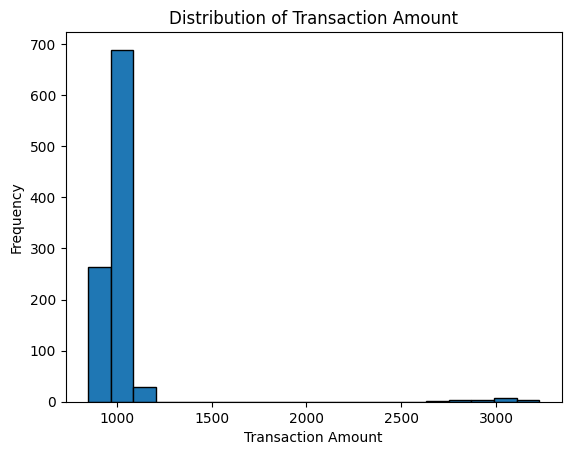

In [4]:

# Assuming 'data' is your DataFrame and 'Transaction_Amount' is a column in it
transaction_amounts = data['Transaction_Amount']

# Plotting the histogram
plt.hist(transaction_amounts, bins=20, edgecolor='black')
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()


<span style="font-size: 1.5em; font-weight: bold;">Box Plot of Transaction Amount by Account Type</span>


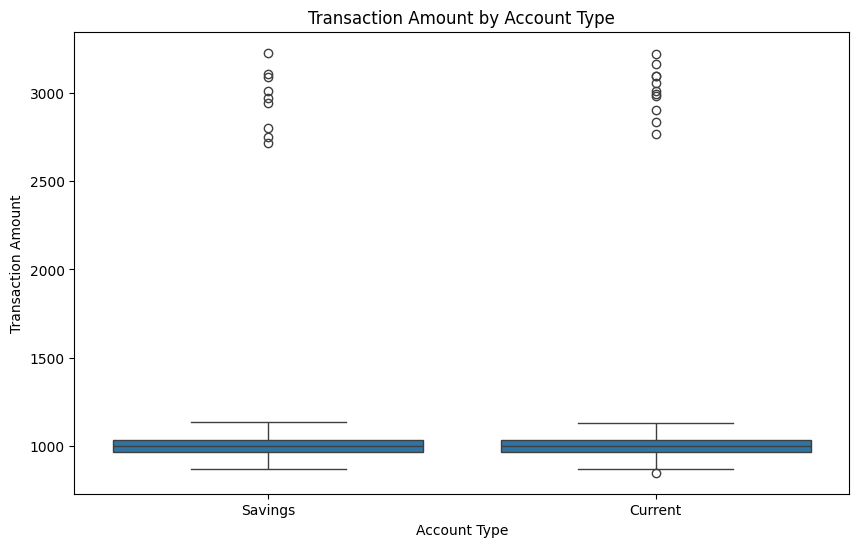

In [5]:
import seaborn as sns  # Optional, but adds better styling

# Assuming 'data' is your DataFrame and 'Account_Type' and 'Transaction_Amount' are columns in it
account_types = data['Account_Type'].unique()

# Create a box plot for each account type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Account_Type', y='Transaction_Amount', data=data)
plt.title('Transaction Amount by Account Type')
plt.xlabel('Account Type')
plt.ylabel('Transaction Amount')
plt.show()

<span style="font-size: 1.5em; font-weight: bold;">Scatter Plot with Trendline: Average Transaction Amount vs. Age</span>


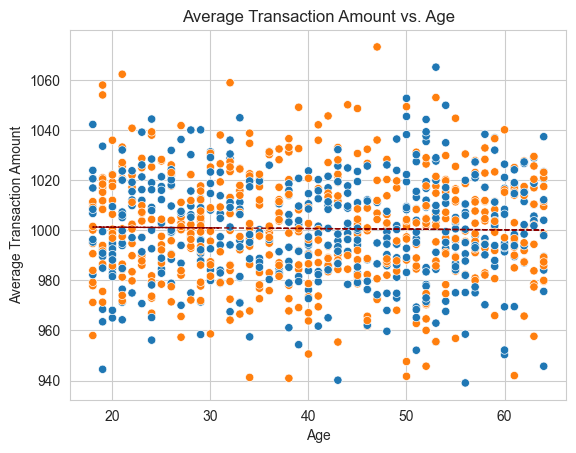

In [6]:
import numpy as np
sns.set_style("whitegrid")
sns.scatterplot(x="Age", y="Average_Transaction_Amount", hue="Account_Type", data=data, legend=False)

# Add the trendline
z = np.polyfit(data["Age"], data["Average_Transaction_Amount"], 1)
p = np.poly1d(z)
plt.plot(data["Age"], p(data["Age"]), color="darkred", linestyle="--", linewidth=1)

plt.title("Average Transaction Amount vs. Age")
plt.xlabel("Age")
plt.ylabel("Average Transaction Amount")
plt.show()

<span style="font-size: 1.5em; font-weight: bold;">Count Plot: Transactions by Day of the Week</span>


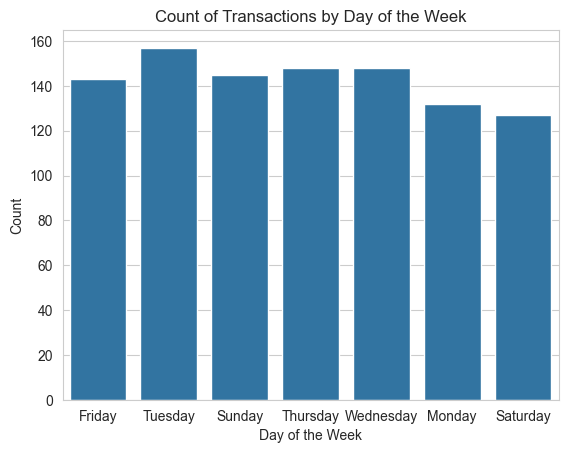

In [7]:
sns.set_style("whitegrid")
sns.countplot(x="Day_of_Week", data=data)

plt.title("Count of Transactions by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Count")
plt.show()

<span style="font-size: 2em; font-weight: bold;">Correlation Heatmap for Numeric Data</span>


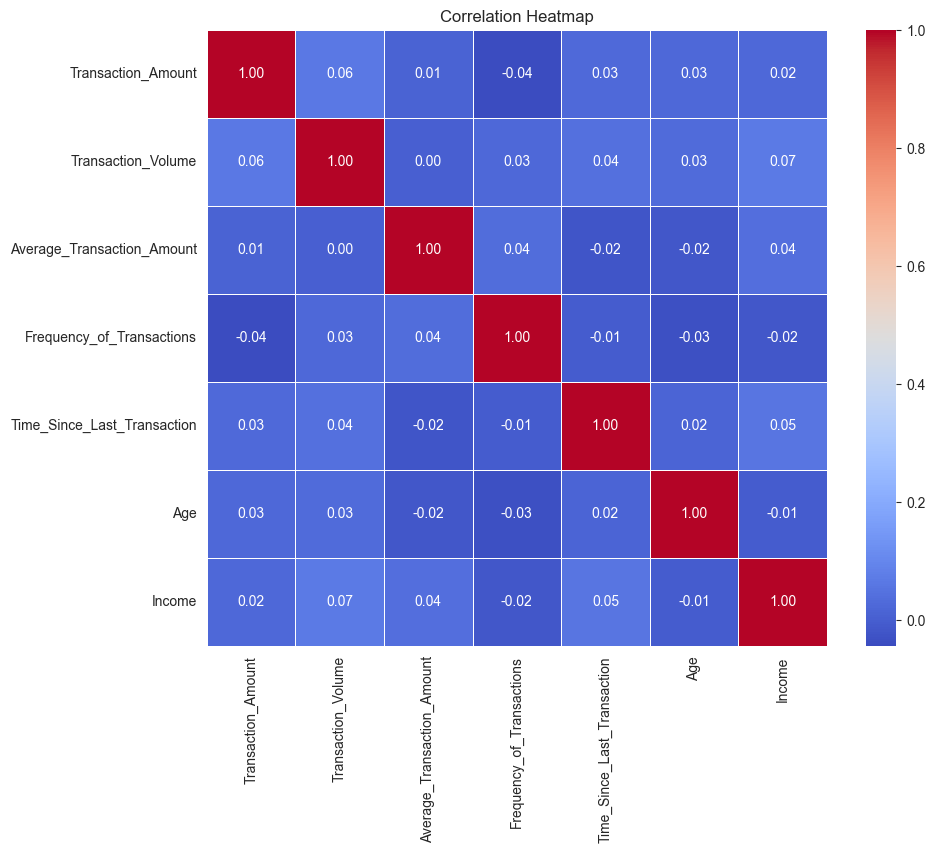

In [9]:
# Assuming 'data' is your DataFrame
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using Seaborn
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Customize the plot
plt.title('Correlation Heatmap')
plt.show()

<span style="font-size: 1.5em; font-weight: bold;">Anomaly Detection: Scatter Plot of Transaction Amount vs. Average Transaction Amount</span>


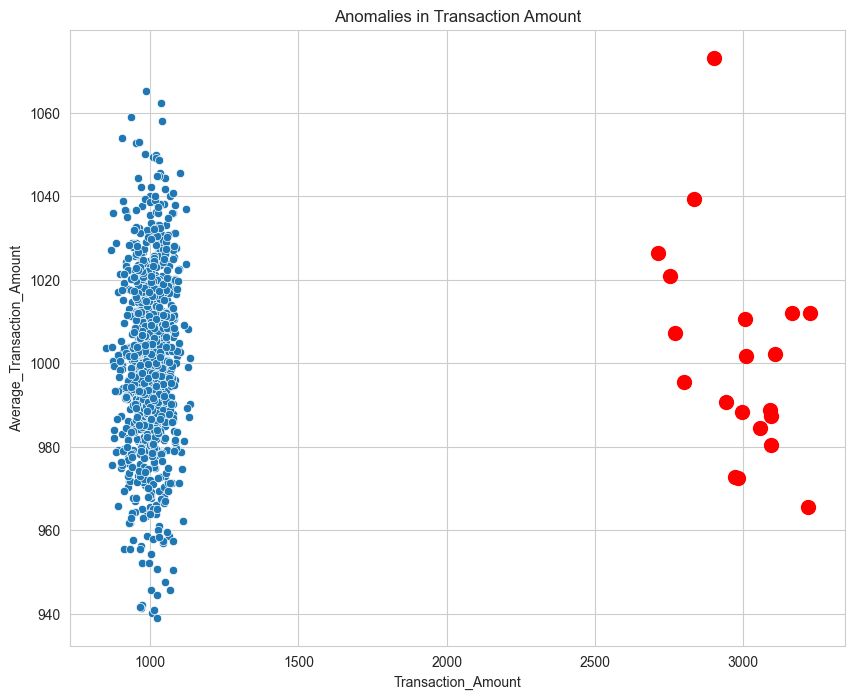

In [10]:
mean_amount = data['Transaction_Amount'].mean()
std_amount = data['Transaction_Amount'].std()

anomaly_threshold = mean_amount + 2 * std_amount

data['Is_Anomaly'] = data['Transaction_Amount'] > anomaly_threshold

plt.figure(figsize=(10, 8))
scatter_plot = sns.scatterplot(x='Transaction_Amount', y='Average_Transaction_Amount', data=data)

scatter_plot.set(title="Anomalies in Transaction Amount")
scatter_plot.scatter(x=data[data['Is_Anomaly']]['Transaction_Amount'],
                     y=data[data['Is_Anomaly']]['Average_Transaction_Amount'],
                     color='red', s=100)

plt.show()

<span style="font-size: 1.5em; font-weight: bold;">Anomaly Detection Results</span>


In [11]:
# Calculate the number of anomalies
num_anomalies = data['Is_Anomaly'].sum()

# Calculate the total number of instances in the dataset
total_instances = data.shape[0]

# Calculate the ratio of anomalies
anomaly_ratio = num_anomalies / total_instances
print(anomaly_ratio)

0.02


<span style="font-size: 1.5em; font-weight: bold;">Anomaly Detection Model Training and Saving</span>


In [15]:
import pickle

relevant_features = ['Transaction_Amount',
                     'Average_Transaction_Amount',
                     'Frequency_of_Transactions']

# Split data into features (X) and target variable (y)
X = data[relevant_features]
y = data['Is_Anomaly']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Isolation Forest model
model = IsolationForest(contamination=0.02, random_state=42)
model.fit(X_train)

model_file = 'annomaly_model.pkl'  # Replace with your desired model file path
with open(model_file, 'wb') as f:
    pickle.dump(model, f)


<span style="font-size: 1.5em; font-weight: bold;">Anomaly Detection Model Evaluation</span>


In [16]:
# Predict anomalies on the test set
y_pred = model.predict(X_test)

# Convert predictions to binary values (0: normal, 1: anomaly)
y_pred_binary = [1 if pred == -1 else 0 for pred in y_pred]

# Evaluate the model's performance
report = classification_report(y_test, y_pred_binary, target_names=['Normal', 'Anomaly'])
print(report)

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       196
     Anomaly       1.00      1.00      1.00         4

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



<span style="font-size: 1.5em; font-weight: bold;">Anomaly Detection for User Input</span>


In [18]:
# Relevant features used during training
relevant_features = ['Transaction_Amount', 'Average_Transaction_Amount', 'Frequency_of_Transactions']

# Get user inputs for features
user_inputs = []
for feature in relevant_features:
    user_input = float(input(f"Enter the value for '{feature}': "))
    user_inputs.append(user_input)

# Create a DataFrame from user inputs
user_df = pd.DataFrame([user_inputs], columns=relevant_features)

# Predict anomalies using the model
user_anomaly_pred = model.predict(user_df)

# Convert the prediction to binary value (0: normal, 1: anomaly)
user_anomaly_pred_binary = 1 if user_anomaly_pred == -1 else 0

if user_anomaly_pred_binary == 1:
    print("Anomaly detected: This transaction is flagged as an anomaly.")
else:
    print("No anomaly detected: This transaction is normal.")

No anomaly detected: This transaction is normal.
